In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 39.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=ac04fbc52528aa464e911b83b15f0ab5441db47a456048d2292a003df63bff3d
  Stored in directory: /tmp/pip-ephem-wheel-cache-foxmjvw7/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=3f8a01066e1bd2594d402d138e93526181a53db31549c11da0b447bc5e12debd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [2]:
# from PID import PID
# from environmentv3 import Environment

import pandas as pd
from sklearn.preprocessing import StandardScaler


def discretize(action):
    return (min(max(action, 100), 0)+12) // 25


def collect_step(environment, control_function):
    time_step = environment.current_time_step()
    action = control_function(time_step.observation, environment.time)
    next_time_step = environment.step(action)

    if next_time_step.is_last():
        environment.reset()

    return time_step, action, next_time_step


def collect_data(env, control_function):
    states = []
    rewards = []
    actions = []

    episode_running_flag = True
    while episode_running_flag:
        time_step, action, next_time_step = collect_step(env, control_function)
        states.append(time_step.observation)
        rewards.append(next_time_step.reward)
        actions.append(action)

        episode_running_flag = not next_time_step.is_last()

    return states, rewards, actions

def analyze_data(data):
    print(data.head(5))
    print("\n")
    print(data.info())




In [ ]:
# Inicjalizacja środowiska i  regulatora
env = Environment(discret=False)
pid = PID()

# Zbieranie danych
states, rewards, actions = collect_data(env, pid.control)
del env

# Konwersja na DataFrame
states = pd.DataFrame(states, columns=["T", "T_zadana"])
rewards = pd.DataFrame(rewards, columns=["Nagrody"])
actions = pd.DataFrame(actions, columns=["Akcje"])

#states.to_csv("./csv_data/states.csv")
rewards.to_csv("./csv_data/rewards.csv")
actions.to_csv("./csv_data/actions.csv")

In [3]:
import pandas as pd


In [92]:
# Rozszerzenie przestrzeni stanu
states["T_błąd"] = states["T_zadana"] - states["T"]
states['T_średnia']  = states['T'].rolling(window=10,center=False).mean()
states['T_średnia50']  = states['T'].rolling(window=50,center=False).mean()
states['T_wariancja'] = states['T'].rolling(window=10,center=False).std()
states['T_wariancja50'] = states['T'].rolling(window=50,center=False).std()
states['T_skośność']  = states['T'].rolling(window=10,center=False).skew()

states['T_błąd_średnia']  = states['T_błąd'].rolling(window=10,center=False).mean()
states['T_błąd_wariancja'] = states['T_błąd'].rolling(window=10,center=False).std()
states['T_błąd_skośność']  = states['T_błąd'].rolling(window=10,center=False).skew()


states['T_błąd_delta'] = states['T_błąd'].diff()
states['T_delta'] = states['T'].diff()
states['T_delta2'] = states['T_delta'].diff()

states['T_zadana_wariancja'] = states['T_zadana'].rolling(window=10,center=False).std()
states['T_zadana_skośność']  = states['T_zadana'].rolling(window=10,center=False).skew()


<ipython-input-92-e80e73dbd429>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states["T_błąd"] = states["T_zadana"] - states["T"]


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import pandas_profiling

<ipython-input-3-b73982fcf4c7>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [90]:
# df = pd.read_csv("states.csv", index_col=0)
# df = pd.concat([pd.read_csv("states1.csv", index_col=0), pd.read_csv("states2.csv", index_col=0),
#                 pd.read_csv("states3.csv", index_col=0), pd.read_csv("states4.csv", index_col=0)], axis=1)
# df = states
# df =  pd.read_csv("trajectory1.csv", index_col=0)

In [91]:
# states = df.iloc[:, :2]
# states["T_zadana"] = states["T"] + (states["T_błąd"]-0.5)*2

<ipython-input-91-61f1722cdf60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states["T_zadana"] = states["T"] + (states["T_błąd"]-0.5)*2


In [93]:
df = states


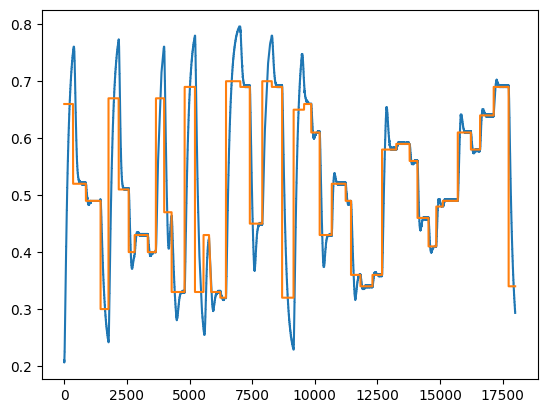

In [69]:
import matplotlib.pyplot as plt
plt.plot(df["T"])
plt.plot(df["T_zadana"])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15649 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   T                   15649 non-null  float64
 1   T_błąd              15649 non-null  float64
 2   T_zadana            15649 non-null  float64
 3   T_średnia           15640 non-null  float64
 4   T_średnia50         15600 non-null  float64
 5   T_wariancja         15640 non-null  float64
 6   T_wariancja50       15600 non-null  float64
 7   T_skośność          15640 non-null  float64
 8   T_błąd_średnia      15640 non-null  float64
 9   T_błąd_wariancja    15640 non-null  float64
 10  T_błąd_skośność     15640 non-null  float64
 11  T_błąd_delta        15648 non-null  float64
 12  T_delta             15648 non-null  float64
 13  T_delta2            15647 non-null  float64
 14  T_zadana_wariancja  15640 non-null  float64
 15  T_zadana_skośność   8580 non-null   float64
dtypes: float6

In [94]:
# df['reward'] = pd.read_csv("trajectory1.csv", index_col=0)["Nagrody"]
# df['actions'] = pd.read_csv("trajectory1.csv", index_col=0)["Akcje"]

In [ ]:
df['reward'] = pd.read_csv("rewards.csv", index_col=0)
df['actions'] = pd.read_csv("actions.csv", index_col=0)

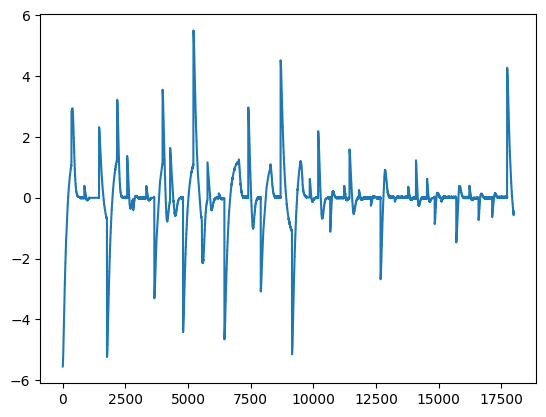

In [72]:
plt.plot(df["reward"])

In [73]:
import numpy as np
def discretize(action):
    return (np.clip(action, 0, 100)+12) // 25

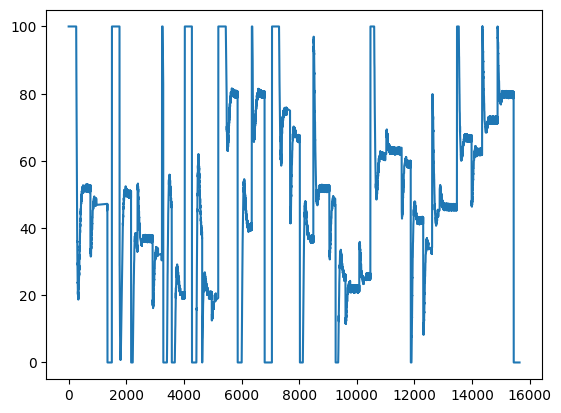

In [74]:
plt.plot((df["actions"].values))

In [95]:
correlation_with_actions = df.corr()['actions'].abs().sort_values(ascending=False)
print(correlation_with_actions)

actions               1.000000
T_zadana              0.893738
T                     0.549856
T_średnia             0.525280
T_błąd_średnia        0.486373
T_błąd                0.469783
reward                0.457177
T_średnia50           0.431301
T_delta               0.290202
T_skośność            0.072753
T_błąd_skośność       0.062246
T_wariancja           0.030360
T_błąd_delta          0.024256
T_błąd_wariancja      0.011998
T_delta2              0.004726
T_wariancja50         0.004219
T_zadana_skośność     0.003412
T_zadana_wariancja    0.002233
Name: actions, dtype: float64


In [96]:
print(correlation_with_actions[correlation_with_actions<0.2])

T_skośność            0.072753
T_błąd_skośność       0.062246
T_wariancja           0.030360
T_błąd_delta          0.024256
T_błąd_wariancja      0.011998
T_delta2              0.004726
T_wariancja50         0.004219
T_zadana_skośność     0.003412
T_zadana_wariancja    0.002233
Name: actions, dtype: float64


In [97]:
df = df.drop(["T_błąd_skośność", "T_wariancja", "T_wariancja50", "T_błąd_delta", "T_skośność","T_zadana_wariancja" ,"T_błąd_skośność" ,"T_zadana_skośność","T_delta2"], axis=1)

In [79]:
correlation_with_reward = df.corr()['reward'].abs().sort_values(ascending=False)
print(correlation_with_reward)

reward              1.000000
T_błąd              0.992927
T_błąd_średnia      0.969838
T_średnia50         0.466993
actions             0.457177
T_średnia           0.415342
T                   0.395770
T_delta             0.257230
T_zadana            0.256989
T_błąd_wariancja    0.016988
Name: reward, dtype: float64


In [80]:
print(correlation_with_reward[correlation_with_reward<0.3])

T_delta             0.257230
T_zadana            0.256989
T_błąd_wariancja    0.016988
Name: reward, dtype: float64


In [98]:
# usunięcie danych mało istotnych z perspektywy  doboru akcji i wartości nagrody
df = df.drop(['T_błąd_wariancja', 'T_delta'], axis=1)

In [99]:
df = df.drop(['reward', 'actions'], axis=1)

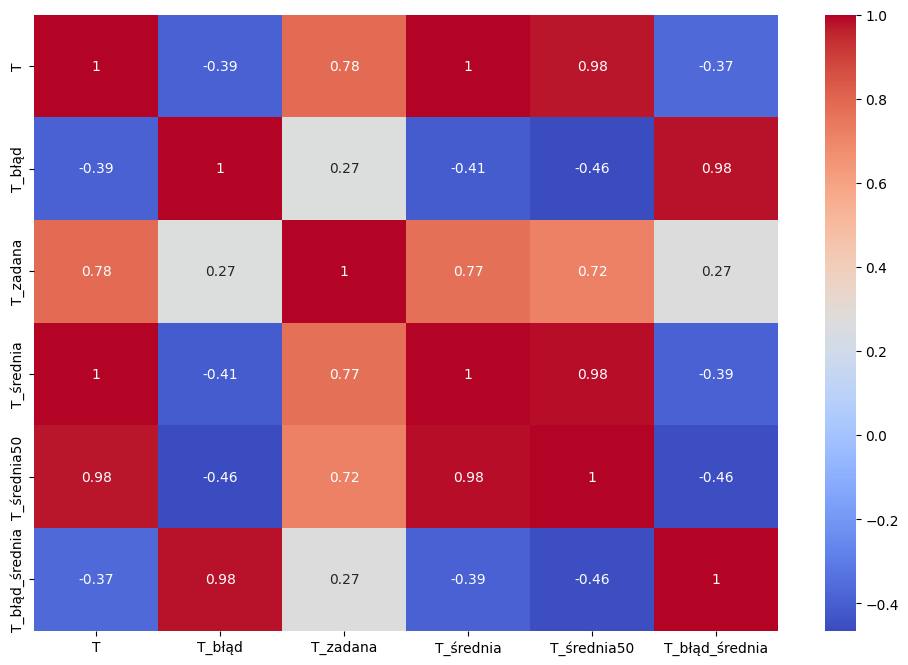

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
# Obliczanie korelacji
correlation_matrix = df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

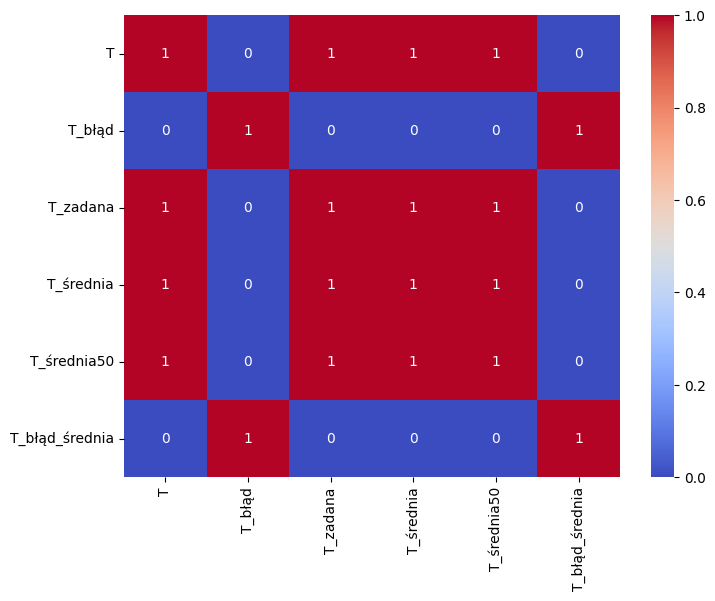

In [85]:
threshold = 0.5
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.abs() > threshold, annot=True, cmap='coolwarm')
plt.show()

In [100]:
df = df.drop(['T_średnia', 'T_średnia50', ], axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15649 entries, 0 to 17999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   T               15649 non-null  float64
 1   T_błąd          15649 non-null  float64
 2   T_zadana        15649 non-null  float64
 3   T_błąd_średnia  15640 non-null  float64
dtypes: float64(4)
memory usage: 611.3 KB


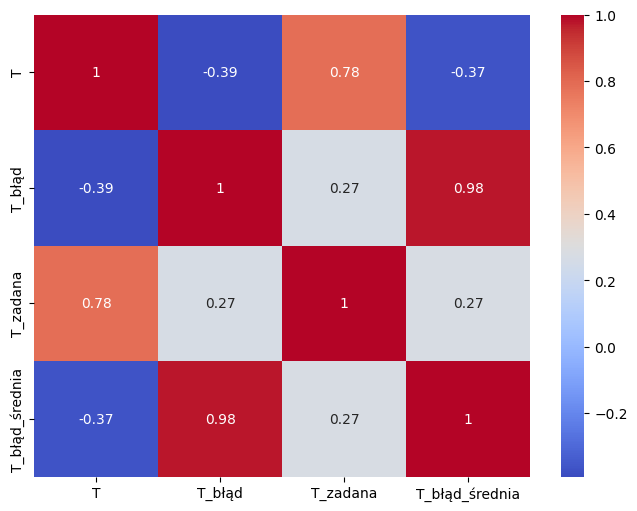

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
# Obliczanie korelacji
correlation_matrix = df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [103]:
df = df.drop(['T_zadana', 'T_błąd_średnia'], axis=1)

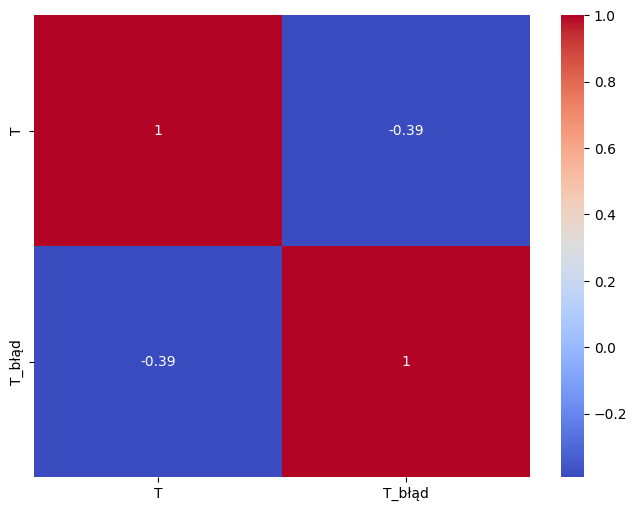

In [105]:
# Obliczanie korelacji
correlation_matrix = df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
profile = pandas_profiling.ProfileReport(df)
profile

In [ ]:
states = df
rewards = pd.read_csv("rewards.csv", index_col=0)
actions = pd.read_csv("actions.csv", index_col=0)


In [ ]:
next_states = pd.DataFrame(states[1:])

next_states = next_states.rename(columns={name: f"{name}'" for name in states.columns})

trajectory = pd.concat((states[:-1], rewards[:-1], actions[:-1], next_states), axis=1)

print("\n Trajektoria \n")
analyze_data(trajectory)


 Trajektoria 

         T  T_zadana   T_błąd  T_wariancja  T_błąd_wariancja  T_delta  \
0  20.9495      43.0  22.0505          NaN               NaN      NaN   
1  20.9495      43.0  22.0505          NaN               NaN   0.0000   
2  20.9495      43.0  22.0505          NaN               NaN   0.0000   
3  21.2718      43.0  21.7282          NaN               NaN   0.3223   
4  21.2718      43.0  21.7282          NaN               NaN   0.0000   

    Nagrody       Akcje       T'  T_zadana'  T_błąd'  T_wariancja'  \
0 -4.695796  134.067045      NaN        NaN      NaN           NaN   
1 -4.695796  135.831085  20.9495       43.0  22.0505           NaN   
2 -4.661352  137.595125  20.9495       43.0  22.0505           NaN   
3 -4.661352  137.399582  21.2718       43.0  21.7282           NaN   
4 -4.661352  139.137838  21.2718       43.0  21.7282           NaN   

   T_błąd_wariancja'  T_delta'  
0                NaN       NaN  
1                NaN    0.0000  
2                NaN    0

In [ ]:
from sklearn.preprocessing import StandardScaler

trajectory = trajectory.dropna()  # Usuwanie wierszy z brakującymi wartościami
trajectory = trajectory.drop_duplicates()

# scaler = StandardScaler()
# trajectory[["T",
#             "T_zadana",
#             "T_błąd",
#             "T_błąd'",
#             "T'",
#             "T_zadana'"]] = trajectory[["T",
#                                         "T_zadana",
#                                         "T_błąd",
#                                         "T_błąd'",
#                                         "T'",
#                                         "T_zadana'"]] / 100

# trajectory[['T_wariancja']] = scaler.fit_transform(trajectory[['T_wariancja']])
# trajectory[['T_błąd_wariancja']] = scaler.fit_transform(trajectory[['T_błąd_wariancja']])
# trajectory[['T_delta']] = scaler.fit_transform(trajectory[['T_delta']])
# trajectory[['Nagrody']] = scaler.fit_transform(trajectory[['Nagrody']])


print(" Oczyszczona, znormalizowana trajektoria")
analyze_data(trajectory)

 Oczyszczona, znormalizowana trajektoria
          T  T_zadana   T_błąd  T_wariancja  T_błąd_wariancja  T_delta  \
9   21.9164      43.0  21.0836     0.373708          0.373708   0.0000   
10  22.2387      43.0  20.7613     0.431075          0.431075   0.3223   
11  22.5610      43.0  20.4390     0.499306          0.499306   0.3223   
12  22.8833      43.0  20.1167     0.564409          0.564409   0.3223   
13  23.2056      43.0  19.7944     0.665740          0.665740   0.3223   

     Nagrody       Akcje       T'  T_zadana'  T_błąd'  T_wariancja'  \
9  -4.556457  143.806803  21.9164       43.0  21.0836      0.373708   
10 -4.520951  143.533907  22.2387       43.0  20.7613      0.431075   
11 -4.485165  143.235227  22.5610       43.0  20.4390      0.499306   
12 -4.449090  142.910763  22.8833       43.0  20.1167      0.564409   
13 -4.449090  142.560515  23.2056       43.0  19.7944      0.665740   

    T_błąd_wariancja'  T_delta'  
9            0.373708    0.0000  
10           0.4310

In [ ]:
trajectory.to_csv("./trajectory.csv")
